# Week-4: Part-1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Set size of figure
plt.rcParams['figure.figsize'] = [8, 8]
# Set size of font
plt.rcParams['font.size'] = 10

## Sampling
The next section will introduce the idea of sampling in NumPy.

We will start by generating a dataset of ones and zeros. The following code generates a sample of size $10$.

In [7]:
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 10)
X

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

Notice that we have used a seed value as an argument to the random number generator. This is meant to ensure reproducability. That is, no matter how many times this cell is run, we will get the same sequence of random numbers. First run the cell a few times to verify that this is true. Now, run the cell with a different seed value and see what happens.

In [13]:
### Data ###
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 10000)
### Solution ###
print(X.mean())

0.4942


in this, the first parameter of rng.choice is the data that it will have , in this case it can either have 0 or 1 or 2 , the size refers to the number of datapoints and p refers to the probablity of each data point, in this case , the probablity of 0 is 0.2 , the probablity of 1 is 0.3 and of 2 is 0.5.

In [27]:
rng = np.random.default_rng(seed = 1001)
X = rng.choice([0,1,2], size = 10, p = [0.2,0.3,0.5])
X

array([2, 0, 0, 2, 0, 1, 2, 0, 0, 0])

## Problem-2

Sample $1000$ points froma  Bernoulli distribution whose parameter is $p = 0.7$. Compute the maximum likelihood estimate of this sample. Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

**Note**

(1) The parameter $p$ of a Bernoulli distribution always points to $P(x = 1)$.

(2) It may seem pointless to compute the MLE when the parameter is already known to us. But this is a good exercise to verify our understanding of concepts with such toy-datasets.

In [39]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.choice([0, 1], size = 1000, p = [0.3, 0.7])
X.mean()

0.707

Mean is known as the maximum likeihood estimate, it is equal to (summation of data points)/n.

In this case , it is approximately equal to the probablity of 1, since that is the number of data points having the value equal to 1.

## Problem-3

Plot a bar graph of the above sample.

<BarContainer object of 2 artists>

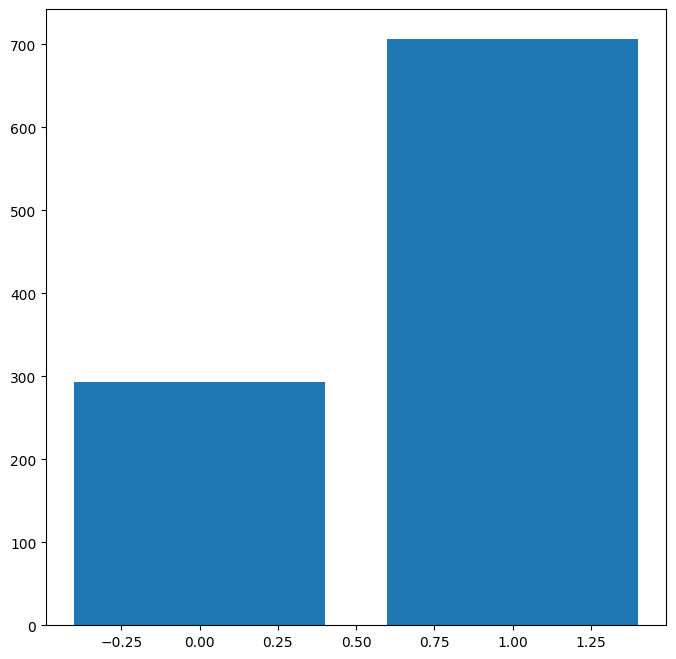

In [ ]:
from collections import Counter
d = Counter()
for i in X:
    d[i] += 1
plt.bar(list(d.keys()),d.values()) #creates the bar chart of all the given samples

## Problem-4

What is the impact of the size of the dataset on the MLE? Generate datasets of the following sizes:

(1) $n = 10$

(2) $n = 100$

(3) $n = 1000$

(4) $n = 10000$

(5) $n = 100000$

(6) $n = 1000000$

Sample each dataset from a Bernoulli distribution with parameter $p = 0.2$. For each dataset, first compute the MLE and then compute the difference (abs value) between the MLE and the true parameter. That is, compute the value $d$ for different values of $n$

$$
d(n) = |\hat{p}_{ML} - p|
$$

Plot $d(n)$ with respect to $n$.



In this, p_ml is the maximum likelihood estimate, which is just the average of all the data, and p is the probablity with which the data is chosen.

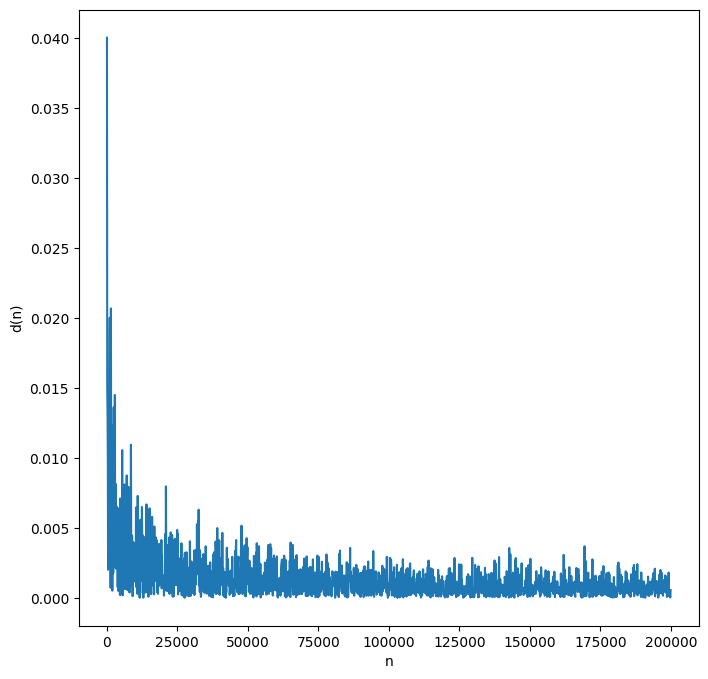

In [ ]:
### Solution ###
rng = np.random.default_rng()
p = 0.2
trials = [100 * i for i in range(1, 2000)]
x_axis, y_axis = [ ], [ ]
for n in trials:
    X = rng.choice([0, 1], size = n, p = [0.8, 0.2])
    p_ml = X.mean()
    y_axis.append(abs(p_ml - p))
    x_axis.append(n)
plt.plot(x_axis, y_axis)
plt.ylabel('d(n)')
plt.xlabel('n')

We have to be careful here. Though the estimate $p_{\tiny ML}$ should become more accurate as $n$ increases, we might be lucky one some occasions. For example, if $n = 10$ and we get two ones and eight zeros, then the estimate is exactly equal to the true parameter. As we can observe in the image, the graph is approximately decreasing only when seen for a really huge amont of data , in case the dataset is small, the decrese in graph can't be noticed.

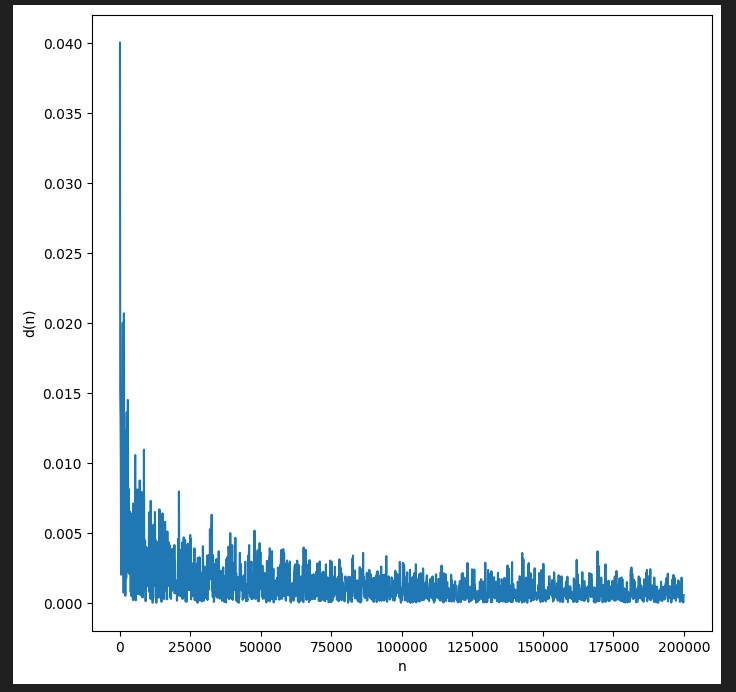

## Problem-5

Sample $1000$ points from a six sided, biased die with faces: $1, 2, 3, 4, 5, 6$. The parameters corresponding to the six faces are:

$$
[0.1, 0.2, 0.3, 0.3, 0.05, 0.05]
$$

Find the maximum likelihood estimate of the parameter $p_3$.

In [80]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.choice([1, 2, 3, 4, 5, 6], size = 1000, p = [0.1, 0.2, 0.3, 0.3, 0.05, 0.05])
sum(X == 3) / X.shape[0]

0.319

## Problem-6

Plot the bar graph for the above sample.

<BarContainer object of 6 artists>

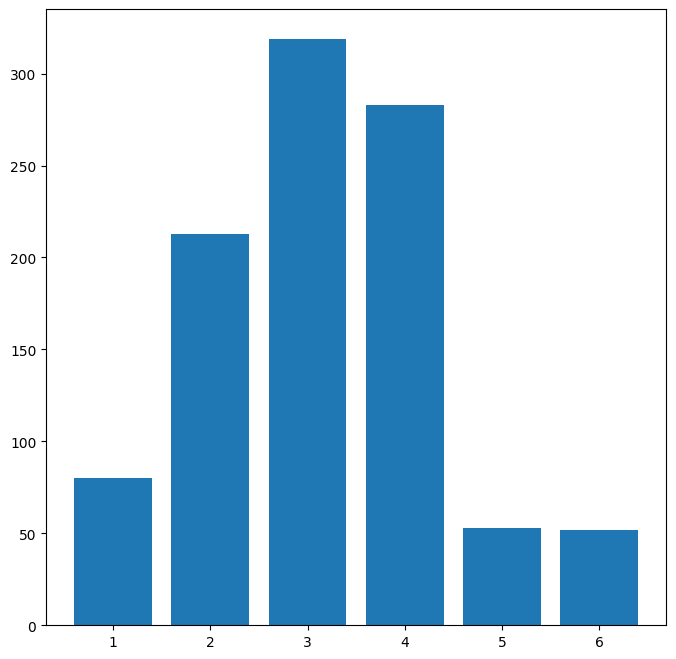

In [81]:
## Solution ##
plt.bar(range(1, 7), [sum(X == f) for f in range(1, 7)])

## Problem-7

Consider the following Gaussian distribution:

$$
\mathcal{N}(3, 1.5^2)
$$

Compute the density of the point $5$ with respect to this distribution. Enter your answer correct to three decimal places.

In [ ]:
## Solution ##
def gaussian(x, mu, sigma):
    den = np.sqrt(2 * np.pi) * sigma
    num = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return num / den

gaussian(5, 3, 1.5)

0.10934004978399575

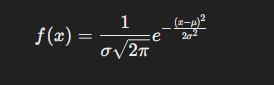

This is the formula for gaussian distribution.

rng.choice creates a distribution with the given data and their corresponding probablities.

rng.normal creates a distribution with the given mean , standar deviation and the number of datasets, in this case we have done rng.normal(3,1.5,1000) meaning 1000 data points with the mean as 3, standard deviation as 1.5.

## Problem-8

Generate a sample of $1000$ points from a Gaussian distribution with mean $3$ and standard deviation $1.5$. Find the maximum likelihood estimate of the mean using this sample.

In [85]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.normal(3, 1.5, 1000)
X.mean()

2.9444187484087863

## Problem-9

Plot a histogram of the dataset given above. Use the `plt.hist` method.

(array([ 14.,  38., 105., 178., 214., 194., 146.,  77.,  26.,   8.]),
 array([-1.14276524, -0.29404916,  0.55466692,  1.403383  ,  2.25209908,
         3.10081516,  3.94953124,  4.79824732,  5.6469634 ,  6.49567948,
         7.34439556]),
 <BarContainer object of 10 artists>)

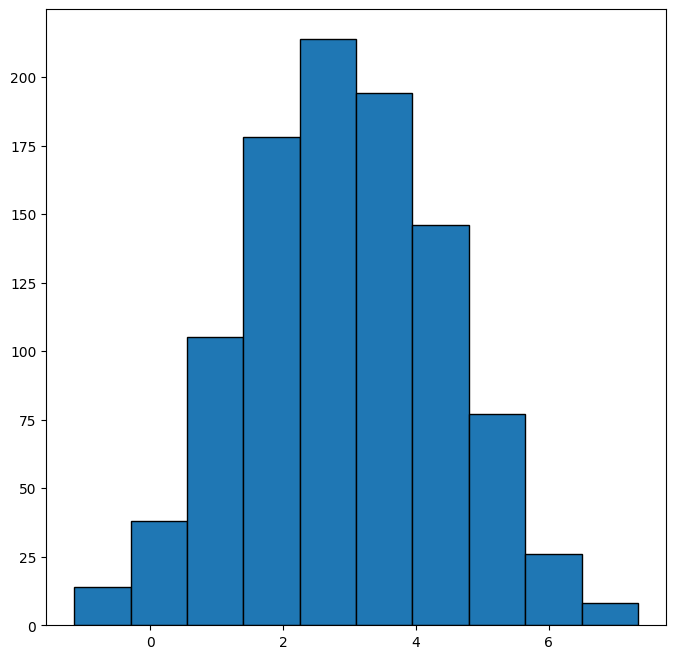

In [ ]:
plt.hist(X, bins = 10, ec = 'black')

## Problem-10

Plot the beta distribution for the following values:

- $\alpha = 5, \beta = 5$
- $\alpha = 5, \beta = 1.5$
- $\alpha = 1.5, \beta = 5$
- $\alpha = 0.5, \beta = 0.5$


Do not worry about the normalization constant.

C:\Users\Om\AppData\Local\Temp\ipykernel_25596\124232541.py:27: RuntimeWarning: divide by zero encountered in power
  bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)


([], [])

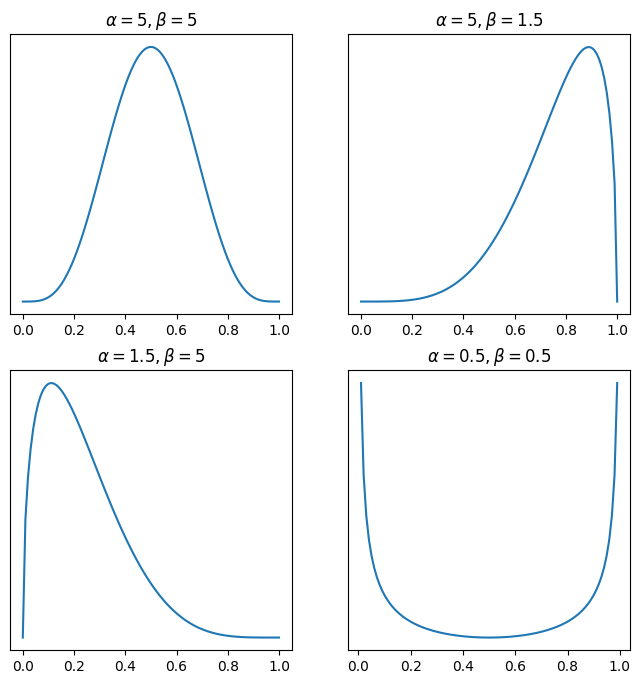

In [94]:
## Solution ##
x = np.linspace(0, 1, 100)
# alpha = 5, beta = 5
plt.subplot(2, 2, 1)
alpha, beta = 5, 5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 5, \beta = 5$')
plt.yticks([ ])
# alpha = 5, beta = 1.5
plt.subplot(2, 2, 2)
alpha, beta = 5, 1.5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 5, \beta = 1.5$')
plt.yticks([ ])
# alpha = 1.5, beta = 5
plt.subplot(2, 2, 3)
alpha, beta = 1.5, 5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 1.5, \beta = 5$')
plt.yticks([ ])
# alpha = 0.5, beta = 0.5
plt.subplot(2, 2, 4)
alpha, beta = 0.5, 0.5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 0.5, \beta = 0.5$')
plt.yticks([ ])